In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Daniel Bandala @ nov-2022
import torch
from torch import nn
from einops import rearrange
from unet import UNet
#from dti_model import DiffusionTensorModel
import matplotlib.pyplot as plt

In [ ]:
model = DiffusionTensorModel(
    in_chans=11,
    out_chans=1,
    img_size = 28,
    embed_dim=512,
    n_heads=[2,2,2,2],
    reduction_ratio=2,
    prob=0.2
)

NameError: ignored

In [ ]:
model = UNet(
    enc_channels=(15,64,128,256,512,1024),
    dec_channels=(1024,512,256,128,64),
    out_chans=1,
    img_size=140
)

In [ ]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [ ]:
get_n_params(model)

31038657

In [ ]:
input_m = torch.randn((15,140,140))
input_m.shape

torch.Size([15, 140, 140])

In [ ]:
#for i in range(96):
y = model(input_m)

In [ ]:
y.shape

torch.Size([140, 140])

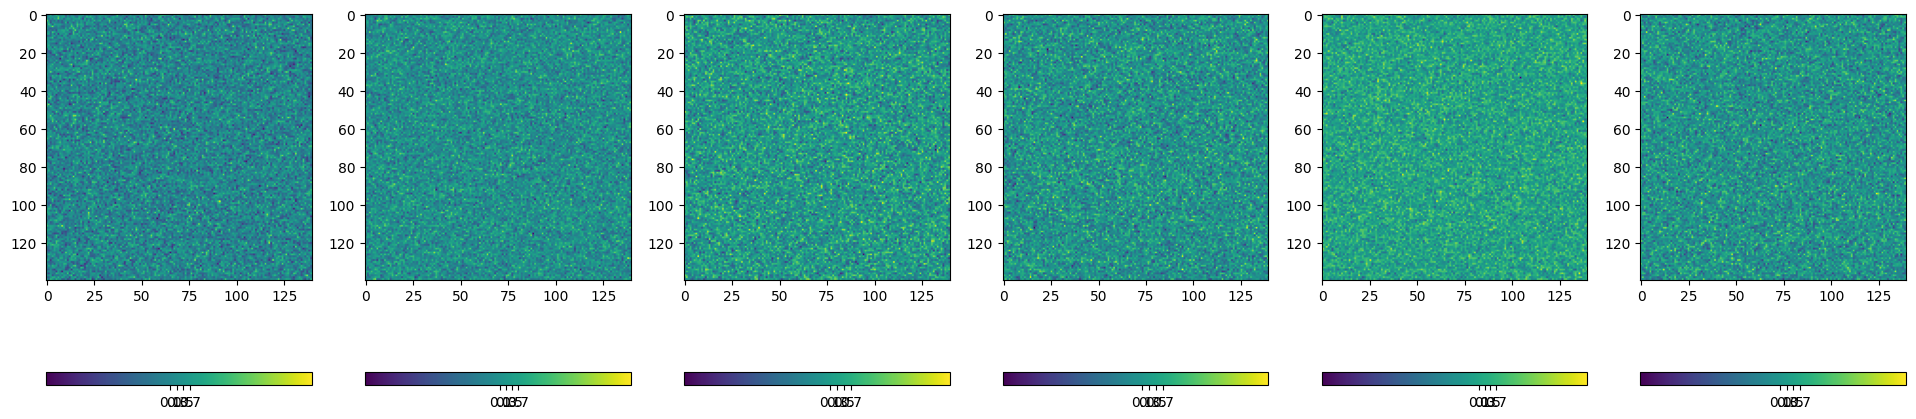

In [ ]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 6, 1)
imgplot = plt.imshow(input_m.detach().numpy()[0])
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 6, 2)
imgplot = plt.imshow(input_m.detach().numpy()[1])
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 6, 3)
imgplot = plt.imshow(input_m.detach().numpy()[2])
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 6, 4)
imgplot = plt.imshow(input_m.detach().numpy()[3])
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 6, 5)
imgplot = plt.imshow(input_m.detach().numpy()[4])
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 6, 6)
imgplot = plt.imshow(input_m.detach().numpy()[5])
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

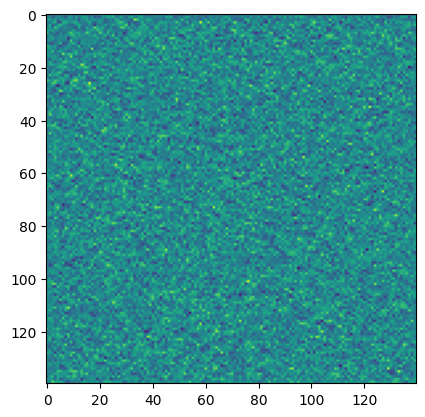

In [ ]:
plt.imshow(y.detach().numpy())

In [ ]:
torch.save(model, "test.weights")

In [ ]:
import os
os.path.getsize("test.weights")

124177803

In [ ]:
y.max()

tensor(0.0315, grad_fn=<MaxBackward1>)

In [ ]:
y.min()

tensor(-0.1113, grad_fn=<MinBackward1>)

In [ ]:
x = torch.randn((11,28,28))

In [ ]:
patches = rearrange(x, "s h w -> s (h w)")

In [ ]:
patches.shape

torch.Size([11, 784])

In [ ]:
patches = patches.expand(1, 784, 11)

In [ ]:
layer = nn.Conv1d(11, 128, kernel_size=3, stride=1, padding=1, bias=False)

In [ ]:
patches_reshaped = patches.permute(0,2,1)

In [ ]:
patches_reshaped.shape

torch.Size([196, 10, 100])

In [ ]:
y = layer(patches)

In [ ]:
y.shape

torch.Size([128, 784])